### 1. 합성곱 층


In [4]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.utils import plot_model

model = Sequential() #sequential 모델 만들기
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='same', input_shape=(150, 150, 3))) #첫 번째 합성곱층
print(model.output_shape)

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='valid',))
print(model.output_shape)

(None, 150, 150, 32)
(None, 148, 148, 32)


입력을 (150,150,32) 로 받아서 *padiding이 same이어서 동일


합성곱층을 거쳐서 (148,148,32)로 변경됨 *padding이 valid여서 커널 사이즈 만큼 줄어들었음

In [5]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      9248      
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


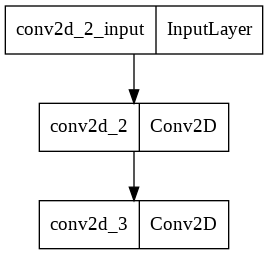

In [6]:
plot_model(model)

### 2. 풀링층

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='same', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2)) #데이터 사이즈 줄여줌(서브샘플링)
model.add(Conv2D(filters=32, kernel_size=(4,4), strides=1, padding='valid', ))
model.add(MaxPooling2D(2,2))
print(model.output_shape)

model.add(Flatten()) #1차원 배열로 완전연결네트워크 구성
print(model.output_shape)

model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax')) #5가지로 분류할 수 있도록 출력 5로 설정

(None, 36, 36, 32)
(None, 41472)


In [10]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 256)              

1. 입력이 (150,150,32)
2. maxpooling 거쳐서 크기가 반으로 줄어듦을 확인
3. padding을 valid로 지정했기 때문에 convolution을 거치면서 크기 또 줄어듦
4. maxpooling 거쳐서 크기 반으로 줄어듦
5. flatten 거쳐서 데이터가 1차원 형태로 변경
6. 은닉층 구성
7. 출력층 구성


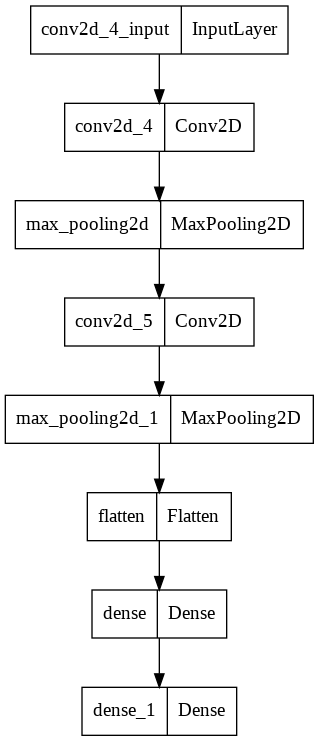

In [11]:
plot_model(model)